# Question-7

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Part-1

In [19]:
def histEqualization(img,ret_cdf=False):
    img = img.astype(np.uint8)
    u,c = np.unique(img,return_counts=True)
    pdf = np.zeros((256,1))
    for i in range(u.size):
        pdf[u[i]] = c[i]
#     pdf[u[:]] = c
    cdf = (np.cumsum(pdf))/img.size
    a = cdf[np.min(u)]
    out = (255/(1-a))*((cdf[img.flat] - a).reshape(img.shape))
    if ret_cdf:
        return cdf
    else:
        return out.astype(np.uint8)

def histMatching(img,ref_img):
    temp = histEqualization(img,ret_cdf=True)
    temp1 = histEqualization(ref_img,ret_cdf=True)
    
    cdf = np.interp(temp,temp1,range(0,256))
#     a = cdf[np.min(u)]
    out = (cdf[img.flat]).reshape(img.shape)
    
    return out.astype(np.uint8)

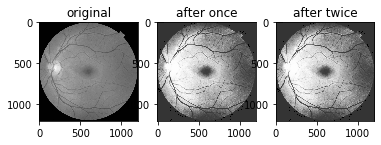

In [20]:
img = cv2.cvtColor(cv2.imread('./../input_data/eyeref.png'),cv2.COLOR_BGR2GRAY)
temp = histEqualization(img)
out = histEqualization(temp)
fig = plt.figure()
fig.add_subplot(131)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,3,2)
plt.title('after once')
plt.imshow(temp,'gray')
plt.subplot(1,3,3)
plt.title('after twice')
plt.imshow(out,'gray')
plt.show()

In [21]:
print("sum of change in intensity values",np.sum(abs(out-temp)))

sum of change in intensity values 0


We can see there is no change in intensity values as sum of change in intensities is 0. This means that if we apply **histogram equalization** multiple times, it has the no effect after one time. This is because the distribution already became uniform when we applied **Histogram Equalization** for the first time. After that it is the same again.

# Part-2

## Similar Histograms

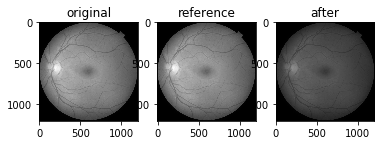

In [22]:
img = cv2.cvtColor(cv2.imread('./../input_data/eye.png'),cv2.COLOR_BGR2GRAY)
img_ref = cv2.cvtColor(cv2.imread('./../input_data/eye.png'),cv2.COLOR_BGR2GRAY)
out = histMatching(img,img_ref)


fig = plt.figure()
fig.add_subplot(131)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,3,2)
plt.title('reference')
plt.imshow(img_ref,'gray')
plt.subplot(1,3,3)
plt.title('after')
plt.imshow(out,'gray')
plt.show()

In [23]:
print("sum of difference in pixel-to-pixel intensity values is",np.sum(abs(img-out)))

sum of difference in pixel-to-pixel intensity values is 432


## Dark -> Light Image

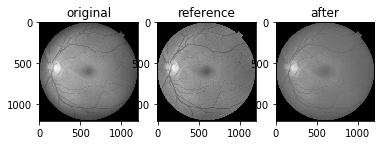

In [24]:
img = cv2.cvtColor(cv2.imread('./../input_data/eye.png'),cv2.COLOR_BGR2GRAY)
img_ref = cv2.cvtColor(cv2.imread('./../input_data/eyeref.png'),cv2.COLOR_BGR2GRAY)
out = histMatching(img,img_ref)

fig = plt.figure()
fig.add_subplot(131)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,3,2)
plt.title('reference')
plt.imshow(img_ref,'gray')
plt.subplot(1,3,3)
plt.title('after')
plt.imshow(out,'gray')
plt.show()

In [25]:
print("sum of difference in pixel-to-pixel intensity values is",np.sum(abs(img-out)))

sum of difference in pixel-to-pixel intensity values is 233128711


## Light -> Dark Image

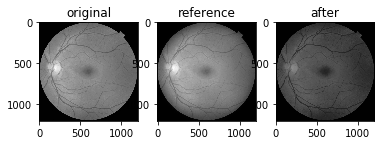

In [26]:
img = cv2.cvtColor(cv2.imread('./../input_data/eyeref.png'),cv2.COLOR_BGR2GRAY)
img_ref = cv2.cvtColor(cv2.imread('./../input_data/eye.png'),cv2.COLOR_BGR2GRAY)
out = histMatching(img,img_ref)

fig = plt.figure()
fig.add_subplot(131)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,3,2)
plt.title('reference')
plt.imshow(img_ref,'gray')
plt.subplot(1,3,3)
plt.title('after')
plt.imshow(out,'gray')
plt.show()

In [27]:
print("sum of difference in pixel-to-pixel intensity values is",np.sum(abs(img-out)))

sum of difference in pixel-to-pixel intensity values is 54038162
